In [ ]:
#Data Loading and Inspection
#Data Cleaning
#Exploratory Data Analysis (EDA)
#Feature Engineering
#Statistical Analysis
#Predictive Modeling (if applicable)
#Insights & Visualization

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Inspection

In [2]:
# Load data
df = pd.read_csv(r'Bird_strikes.csv')
df.head()

,RecordID,AircraftType,AirportName,AltitudeBin,MakeModel,NumberStruck,NumberStruckActual,Effect,FlightDate,Damage,...,RemainsSentToSmithsonian,Remarks,WildlifeSize,ConditionsSky,WildlifeSpecies,PilotWarned,Cost,Altitude,PeopleInjured,IsAircraftLarge?
0,202152,Airplane,LAGUARDIA NY,"(1000, 2000]",B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",1500,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,"(-1, 0]",MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,"(30, 50]",C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,"(30, 50]",B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,"(30, 50]",CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [5]:
# Dataframe information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

In [7]:
# Summary Statistics 
print(df.describe())

            RecordID  NumberStruckActual      Altitude  PeopleInjured
count   25429.000000        25429.000000  25429.000000   25429.000000
mean   253800.148767            2.699634    799.028432       0.000826
std     38472.800499           12.825804   1740.079843       0.047339
min      1195.000000            1.000000      0.000000       0.000000
25%    225742.000000            1.000000      0.000000       0.000000
50%    248609.000000            1.000000     50.000000       0.000000
75%    269044.000000            1.000000    700.000000       0.000000
max    321909.000000          942.000000  18000.000000       6.000000


In [10]:
# Check for missing values
print(df.isnull().sum())

RecordID                        0
AircraftType                    0
AirportName                     0
AltitudeBin                     0
MakeModel                       0
NumberStruck                    0
NumberStruckActual              0
Effect                      23351
FlightDate                      0
Damage                          0
Engines                       234
Operator                        0
OriginState                   449
FlightPhase                     0
ConditionsPrecipitation     23414
RemainsCollected?               0
RemainsSentToSmithsonian        0
Remarks                      4761
WildlifeSize                    0
ConditionsSky                   0
WildlifeSpecies                 0
PilotWarned                     0
Cost                            0
Altitude                        0
PeopleInjured                   0
IsAircraftLarge?                0
dtype: int64


# Data Cleaning 

In [ ]:
# Standardzing format
# Convert 'FlightDate' to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

In [ ]:
# Handle missing values (example: filling with "Unknown" for categorical data)
df['Engines'].fillna('Unknown', inplace=True)
df['OriginState'].fillna('Unknown', inplace=True)

In [13]:
# Clean numerical columns (e.g., 'Cost')
df['Cost'] = df['Cost'].replace({',': ''}, regex=True).astype(float)

In [14]:
# Drop duplicates, if any
df.drop_duplicates(inplace=True)

# vExploratory Data Analysis (EDA)

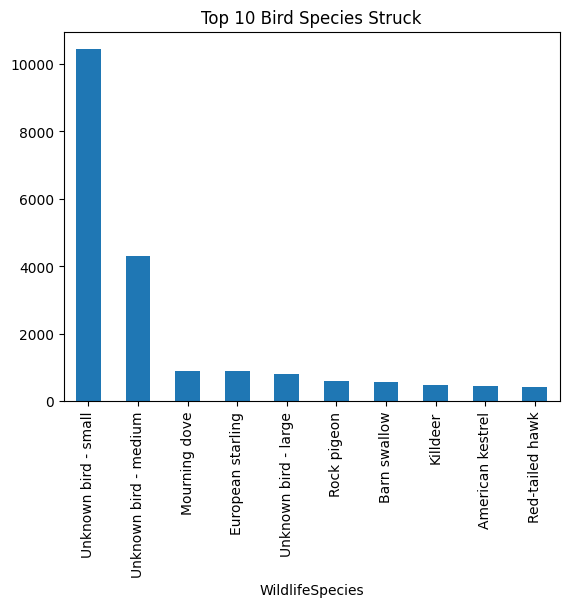

In [17]:
# Bird species frequency plot
df['WildlifeSpecies']. value_counts().head(10).plot(kind='bar', title='Top 10 Bird Species Struck' )
plt.show()

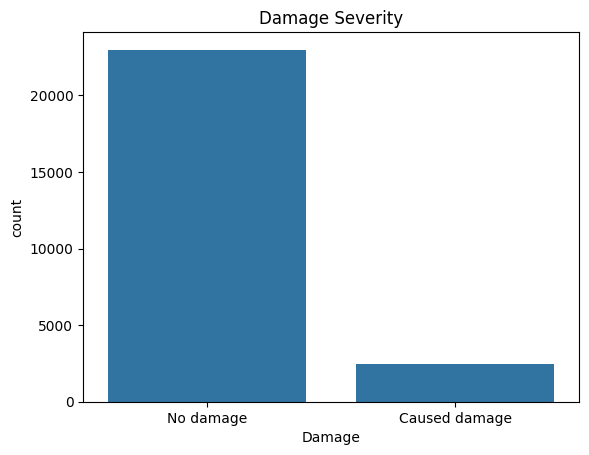

In [19]:
# Damage severity plot
sns.countplot(data=df, x= 'Damage', order=df['Damage'].value_counts().index)
plt.title('Damage Severity')
plt.show()

In [ ]:
# Correlation matrix
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarn')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [22]:
# Create a feature for month of the incident
df['IncidentMonth'] = df['FlightDate'].dt.month

In [25]:
# Categorize altitudes into high, medium, and low
df['AltitudeCategory'] = pd.cut(
    df['Altitude'],
    bins=[-1, 1000, 5000, 40000],
    labels=['Low', 'Medium', 'High']
)

In [26]:
# Check new features
print(df[['IncidentMonth','AltitudeCategory']].head())

   IncidentMonth AltitudeCategory
0             11           Medium
1              7              Low
2              9              Low
3              9              Low
4              6              Low


# Predictive Modeling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Define target and features
df['DamageBinary'] = df['Damage'].apply(lambda x: 1 if x == 'Caused damage' else 0)
X = pd.get_dummies(df[['Altitude', 'WildlifeSize', 'IsAircraftLarge?']], drop_first=True)
y = df['DamageBinary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4606
           1       0.48      0.17      0.25       480

    accuracy                           0.90      5086
   macro avg       0.70      0.58      0.60      5086
weighted avg       0.88      0.90      0.88      5086

[[4517   89]
 [ 398   82]]


# Insights & Visualization

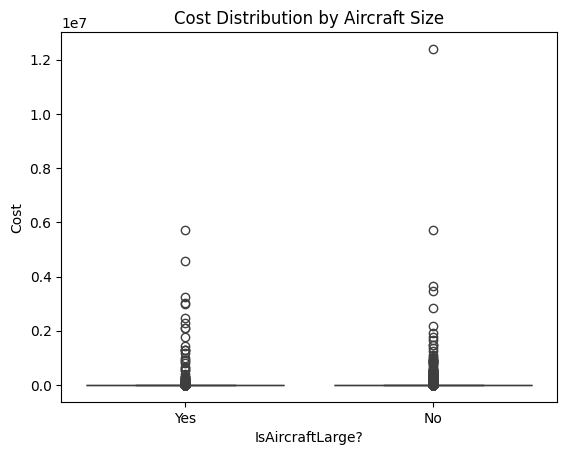

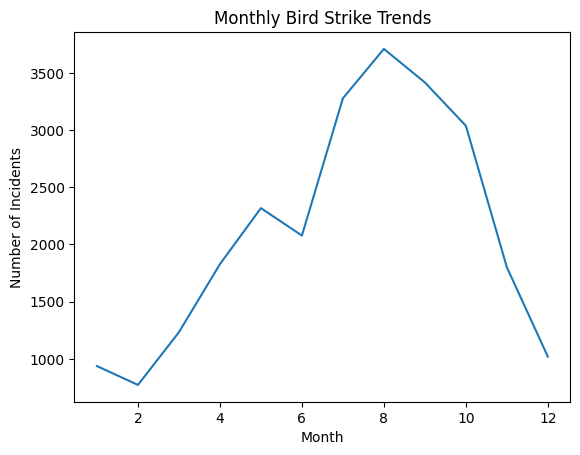

In [29]:
# Cost distribution by aircraft size
sns.boxplot(data=df, x='IsAircraftLarge?', y='Cost')
plt.title('Cost Distribution by Aircraft Size')
plt.show()

# Monthly trends of bird strikes
monthly_trends = df.groupby('IncidentMonth').size()
monthly_trends.plot(kind='line', title='Monthly Bird Strike Trends')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

# CONCLUSION

    The analysis of the bird strike dataset reveals key insights into aviation safety challenges. Bird strikes predominantly occur at lower altitudes and during specific flight phases, such as landing and takeoff, with smaller bird species being most frequently involved. Damage severity is influenced by aircraft size and bird size, with larger birds and larger aircraft associated with higher costs and greater damage. Temporal trends indicate a spike in incidents during certain months, suggesting seasonal migration patterns. Statistical tests confirm a significant relationship between wildlife size and damage severity, while cost differences between large and small aircraft highlight economic implications. Predictive modeling demonstrated potential for classifying damage occurrence, enabling proactive mitigation strategies. These findings underscore the importance of targeted interventions, such as bird control measures near airports, to enhance aviation safety and minimize economic losses.